<a href="https://colab.research.google.com/github/ImDamandeepKaur/Machine-Learning-Analysis/blob/main/Health_Sleep_Statstics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**DATASET LINK**: https://www.kaggle.com/datasets/hanaksoy/health-and-sleep-statistics

In [ ]:
df = pd.read_csv(f'/content/Health_Sleep_Statistics.csv') #f: formatted
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [ ]:
df.size

1200

In [ ]:
df.columns.size

12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


##**Data we are getting from Description**
##AGE: Adults [22-50] || Sleep Quality: min-7, max-9

In [ ]:
df.isna().sum() #to find any null values

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Removing User ID column as its not required
df.drop(['User ID'], axis =1, inplace = True)

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


## **Age vs Sleep Quality Analysis**

In [ ]:
age_sleep_quality_corr = df[['Age','Sleep Quality']].corr()
age_sleep_quality_corr # From Correlation: Age = 1/Sleep Quality

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


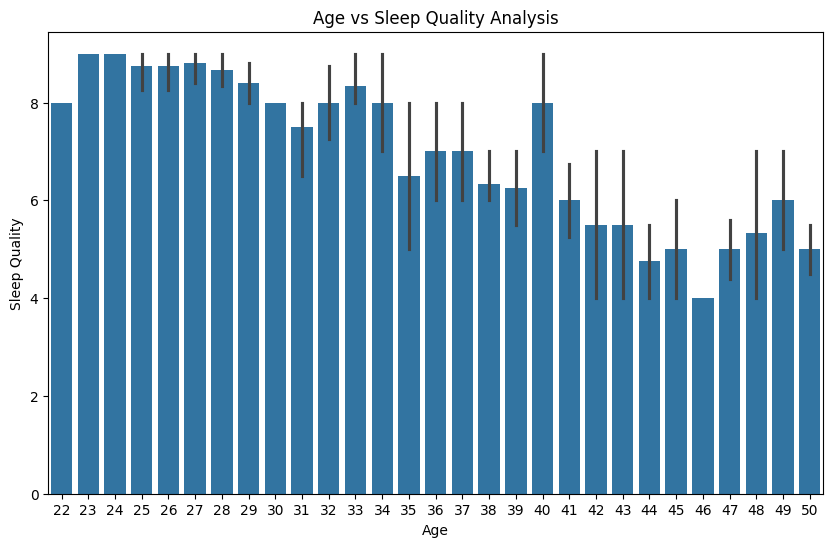

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='Age', y='Sleep Quality',data = df)
plt.title("Age vs Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model = LinearRegression()
x = df[['Age']] #double bracket: set multiple of Rows {features}
y= df['Sleep Quality']#Single Bracket: single Array

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [ ]:
age_sleep_quality_model.intercept_

13.268812023190648

In [ ]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [ ]:
age_sleep_quality_predictions = age_sleep_quality_model.predict(x)

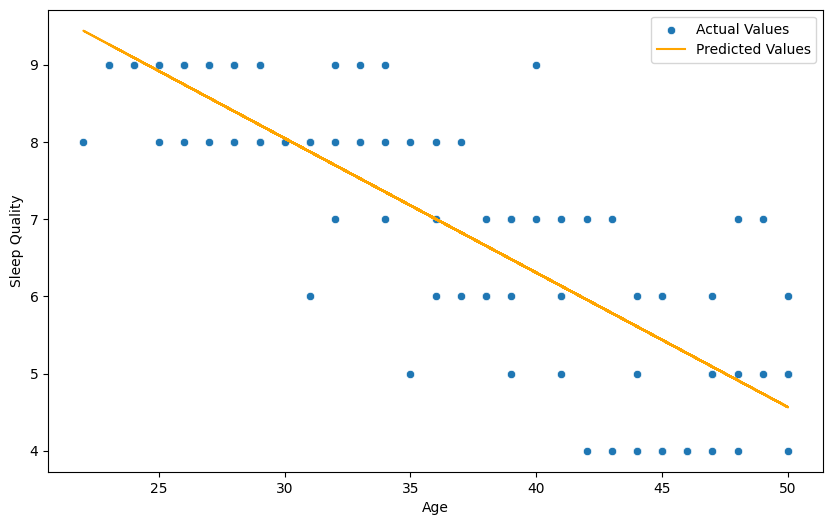

In [ ]:
plt.figure(figsize= (10,6))
sns.scatterplot(x='Age', y='Sleep Quality', data=df, label = 'Actual Values')
plt.plot(x, age_sleep_quality_predictions, color = 'orange', label= 'Predicted Values')
plt.legend()
plt.show()

# **Physical Activtiy vs Sleep Quality**

In [ ]:
df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [ ]:
df['Gender'].head()

,Gender
0,f
1,m
2,f
3,m
4,f


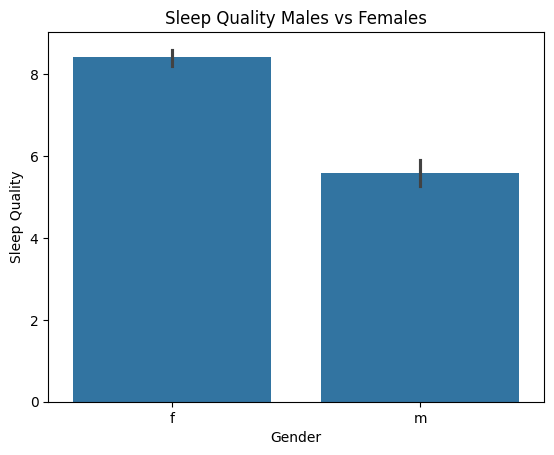

In [ ]:
# Sleep Quality Males vs Females
sns.barplot(x='Gender',y='Sleep Quality',data=df)
plt.title("Sleep Quality Males vs Females")
plt.xlabel("Gender")
plt.ylabel("Sleep Quality")
plt.show()

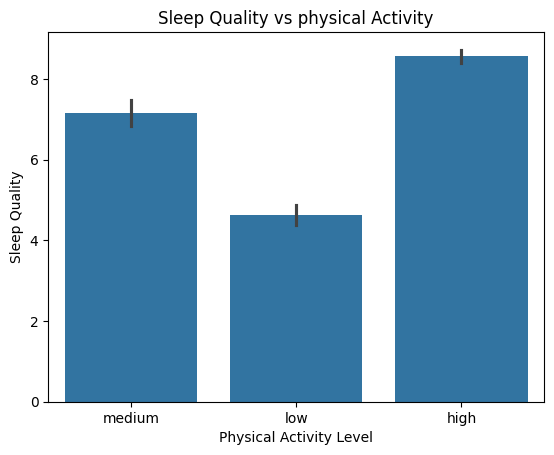

In [ ]:
#Sleep Quality vs physical Activity
sns.barplot(x='Physical Activity Level',y='Sleep Quality',data=df)
plt.title("Sleep Quality vs physical Activity")
plt.xlabel("Physical Activity Level")
plt.ylabel("Sleep Quality")
plt.show()

In [ ]:
custom_codes = {'low':1,'medium':2, 'high':3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

,Physical Activity Level
0,2
1,1
2,3
3,1
4,3


<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

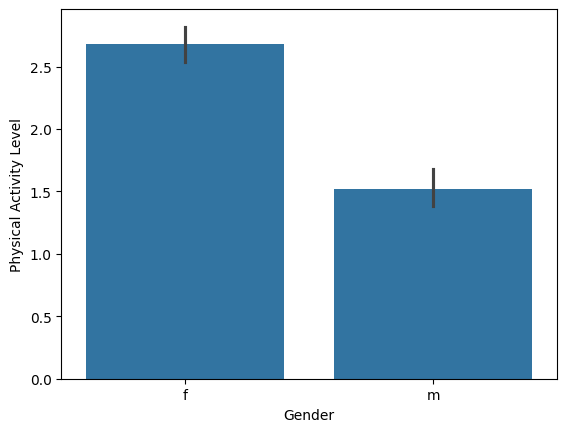

In [ ]:
sns.barplot(x='Gender',y='Physical Activity Level',data=df)
#After Analysis of the data the Females are doing more Physical Activity
#Therefore there Sleep Quality is BETTER

In [ ]:
# Let's Find out that Our Analysis is Correct or It's just randomly distributed, using T&P test
from scipy import stats

sleep_quality_in_males = df[df['Gender']=='m']['Sleep Quality']
sleep_quality_in_females = df[df['Gender']=='f']['Sleep Quality']

physical_activity_level_in_males = df[df['Gender']=='m']['Physical Activity Level']
physical_activity_level_in_females = df[df['Gender']=='f']['Physical Activity Level']


# **T and P values for Sleep Quality vs Gender & Physical Activity vs Gender**

In [ ]:
t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_in_males, sleep_quality_in_females)

print(f"t_stats for Sleep Quality vs Gender : {t_sleep_quality:.2f}")
print(f"p_value for Sleep Quality vs Gender : {p_sleep_quality:.2f}")

# If t_stats is greater irrespective of -ve/+ve -> the feature is dependent on the Y
# Lesser the p_stats valur more the dependency {Important Feature}

t_stats for Sleep Quality vs Gender : -14.32
p_value for Sleep Quality vs Gender : 0.00


In [ ]:
t_physical_activity, p_Physical_activity = stats.ttest_ind(physical_activity_level_in_males, physical_activity_level_in_females)

print(f"t_stats for Physical Activity vs Gender : {t_physical_activity:.2f}")
print(f"p_value for Physical Activity vs Gender : {p_Physical_activity:.2f}")


t_stats for Physical Activity vs Gender : -10.98
p_value for Physical Activity vs Gender : 0.00


#**Time of Sleep & waking up vs Sleep Quality**

In [ ]:
df['Bedtime'].head()

,Bedtime
0,23:00
1,00:30
2,22:45
3,01:00
4,23:30


In [ ]:
df['Wake-up Time'].head()

,Wake-up Time
0,06:30
1,07:00
2,06:45
3,06:30
4,07:00


In [ ]:
#Turning dtype object form to float form
def sleep_time_helper_function(str_time):

  if isinstance(str_time, str):
    h = str_time.split(":")[0]
    m = str_time.split(":")[1]
    return int(h) + int(m)/60
  else:
    return str_time

df['Bedtime'] = df['Bedtime'].apply(sleep_time_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_time_helper_function)

In [ ]:
df['Bedtime'].head()

,Bedtime
0,23.00
1,0.50
2,22.75
3,1.00
4,23.50


In [ ]:
# Adding new column
df['Sleep Duration Hours']=(df['Wake-up Time']-df['Bedtime']) % 24
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

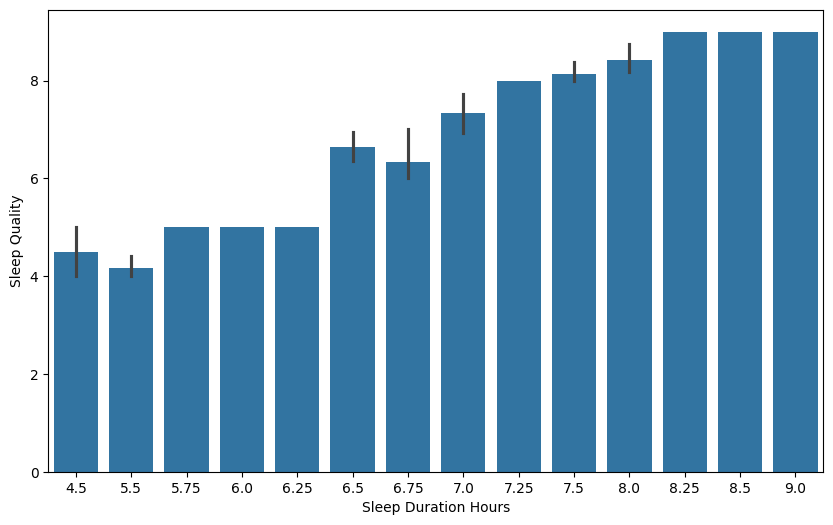

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Sleep Duration Hours", y= "Sleep Quality", data = df)
#Conclusion: Sleep duration = sleep Quality {directly proportional}

In [ ]:
#Linear Model
sleep_duration_model = LinearRegression()
x = df[['Sleep Duration Hours']]
y = df['Sleep Quality']
sleep_duration_model.fit(x,y)

LinearRegression()

In [ ]:
sleep_duration_model.coef_

array([1.36940999])

In [ ]:
sleep_duration_model.intercept_

-2.575599349763152

In [ ]:
sleep_duration_model_predictions = sleep_duration_model.predict(x)

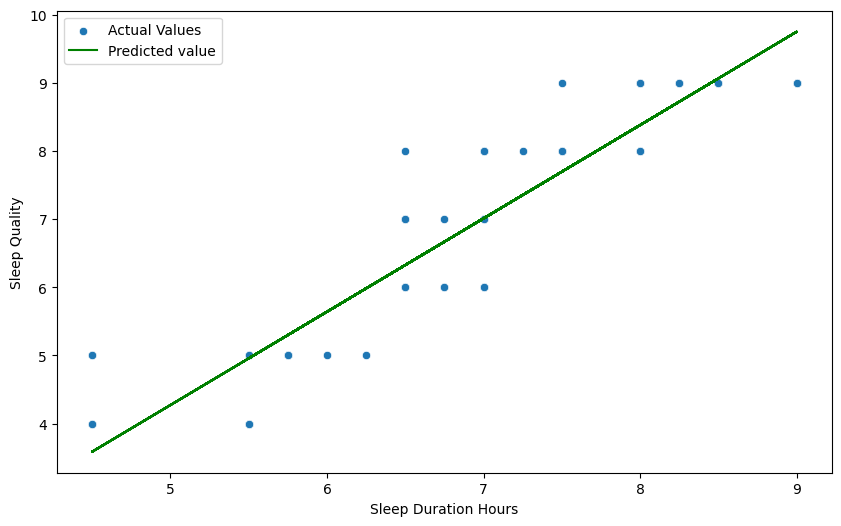

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sleep Duration Hours', y='Sleep Quality', data=df, label='Actual Values')
plt.plot(x, sleep_duration_model_predictions, color='green', label='Predicted value')
plt.legend()
plt.show()

#**Sleep Disorders vs Sleep Quality**

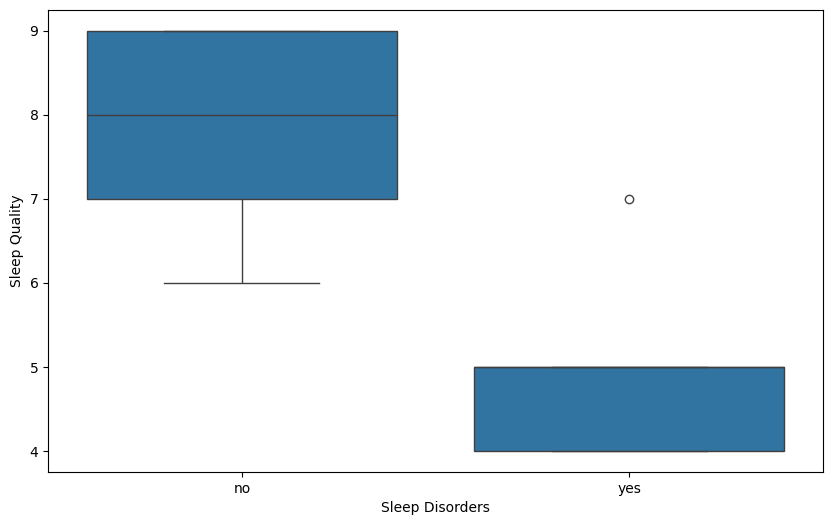

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "Sleep Disorders", y= "Sleep Quality", data=df)
plt.show()

In [ ]:
df_numeric_features = df.select_dtypes(include = ['int64','float64'])
df_numeric_features.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


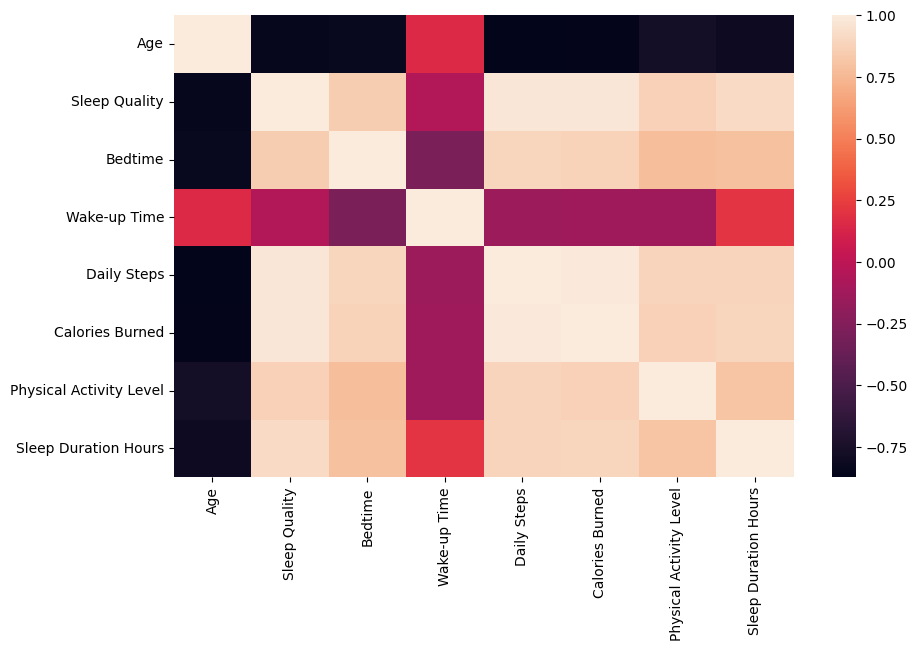

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric_features.corr())
plt.show()